In [206]:
## TODO 1 : Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [208]:
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rssan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rssan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rssan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [210]:
##Load, clean and preprocess the raw review data from the CSV file.
df = pd.read_csv("amazon_product_reviews - amazon_product_reviews.csv")
df = df.dropna(subset=['reviews.text'])
df.head()

,id,name,asins,brand,categories1,categories2,reviews.dateAdded,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,5,Very lightweight and portable with excellent b...,Works Great,Purchaser1
1,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,5,I like this so much more than the Voyage. The ...,In love,kcladyz
2,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,5,Replacing older reader without a light and tra...,Great size,Bbshop
3,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,4,This is my first e-reader. I didn't know about...,Very light,diannez
4,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,4,This kindle is awesome. I love the design of i...,Great kindle,Brandon


In [212]:
# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)   # remove links
    text = re.sub(r"[^a-z\s]", "", text)  # remove special characters/numbers
    return text

df['cleaned_feedback'] = df['reviews.text'].apply(clean_text)
df.head()

,id,name,asins,brand,categories1,categories2,reviews.dateAdded,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,cleaned_feedback
0,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,5,Very lightweight and portable with excellent b...,Works Great,Purchaser1,very lightweight and portable with excellent b...
1,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,5,I like this so much more than the Voyage. The ...,In love,kcladyz,i like this so much more than the voyage the s...
2,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,5,Replacing older reader without a light and tra...,Great size,Bbshop,replacing older reader without a light and tra...
3,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,4,This is my first e-reader. I didn't know about...,Very light,diannez,this is my first ereader i didnt know about th...
4,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,B00VINDBJK,Amazon,"eBook Readers,Kindle E-readers,Computers & Tab...",Digital Reading & Multi-Device Solutions,2017-07-15T19:01:03Z,True,0.0,4,This kindle is awesome. I love the design of i...,Great kindle,Brandon,this kindle is awesome i love the design of it...


In [214]:
##Perform exploratory data analysis (EDA) and visualize key trends using Matplotlib/Seaborn.
print(df.shape)
print(df.columns.tolist())
print(df.head())

(3076, 14)
['id', 'name', 'asins', 'brand', 'categories1', 'categories2', 'reviews.dateAdded', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username', 'cleaned_feedback']
                     id                                               name  \
0  AVqVGZO3nnc1JgDc3jGK  Kindle Oasis E-reader with Leather Charging Co...   
1  AVqVGZO3nnc1JgDc3jGK  Kindle Oasis E-reader with Leather Charging Co...   
2  AVqVGZO3nnc1JgDc3jGK  Kindle Oasis E-reader with Leather Charging Co...   
3  AVqVGZO3nnc1JgDc3jGK  Kindle Oasis E-reader with Leather Charging Co...   
4  AVqVGZO3nnc1JgDc3jGK  Kindle Oasis E-reader with Leather Charging Co...   

        asins   brand                                        categories1  \
0  B00VINDBJK  Amazon  eBook Readers,Kindle E-readers,Computers & Tab...   
1  B00VINDBJK  Amazon  eBook Readers,Kindle E-readers,Computers & Tab...   
2  B00VINDBJK  Amazon  eBook Readers,Kindle E-readers,Computers & Tab...

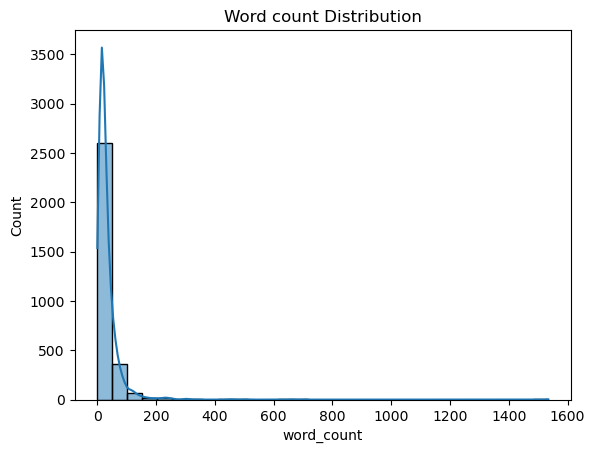

In [216]:
# Word count distribution
df['word_count'] = df['cleaned_feedback'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Word count Distribution")
plt.show()

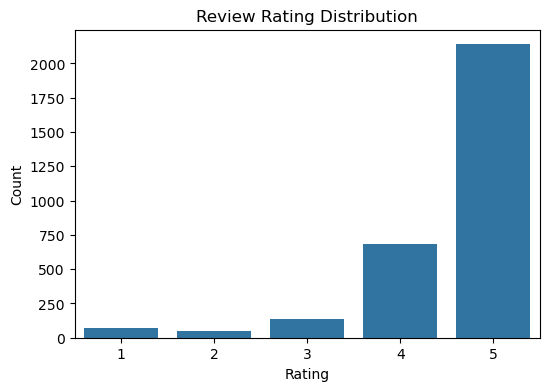

In [218]:
#Review Rating Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="reviews.rating", data=df)
plt.title("Review Rating Distribution")  # must exactly match
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [286]:
#Basic cleaning and create column if it doesn't exist
TEXT_COL = 'reviews.text'   # <- change this to the actual name shown in df.columns
import re
def clean_text(x):
    if pd.isna(x):
        return ""
    s = str(x).lower()
    s = re.sub(r"http\S+|www\.\S+", "", s)
    s = re.sub(r"[^a-z\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# Create (or overwrite) column 'cleaned'
df['cleaned'] = df[TEXT_COL].apply(clean_text)
print("'cleaned' column created. Sample:")
display(df[['cleaned']].head())

'cleaned' column created. Sample:


,cleaned
0,very lightweight and portable with excellent b...
1,i like this so much more than the voyage the s...
2,replacing older reader without a light and tra...
3,this is my first e reader i didn t know about ...
4,this kindle is awesome i love the design of it...


In [227]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    try:
        text = "" if pd.isna(text) else str(text)
        if text.strip() == "":
            return "neutral"
        score = sia.polarity_scores(text)['compound']
        if score >= 0.05:
            return "positive"
        elif score <= -0.05:
            return "negative"
        else:
            return "neutral"
    except Exception as e:
        # log or print(e) if you want to debug specific rows
        return "neutral"


In [229]:
# Apply
df['sentiment'] = df['cleaned'].apply(get_sentiment)
print(df['sentiment'].value_counts())
display(df[['cleaned','sentiment']].head())

sentiment
positive    2680
neutral      213
negative     183
Name: count, dtype: int64


,cleaned,sentiment
0,very lightweight and portable with excellent b...,positive
1,i like this so much more than the voyage the s...,positive
2,replacing older reader without a light and tra...,positive
3,this is my first e reader i didn t know about ...,positive
4,this kindle is awesome i love the design of it...,positive


In [252]:
!pip install --quiet wordcloud

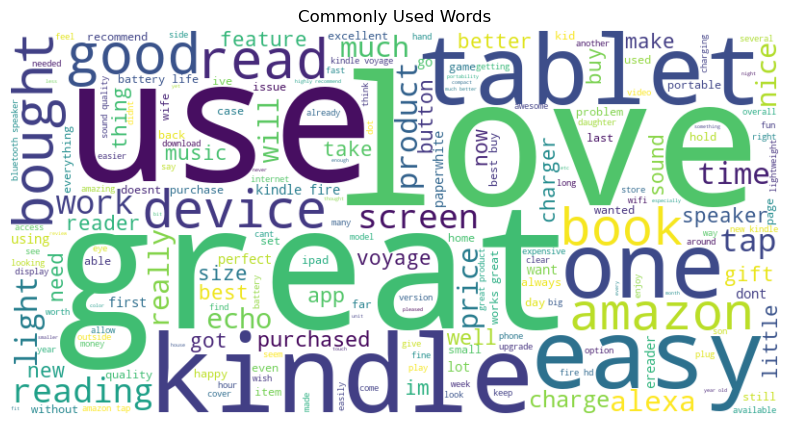

Commonly Used Words
       word  count
6    kindle   1006
4     great    924
13      use    624
8      love    578
2      easy    514
12   tablet    464
3      good    447
0    amazon    444
7      like    411
9      read    359
1    bought    357
11   screen    341
5      just    335
10  reading    335
14    works    319


In [262]:
# --- WordCloud for most repeated feedback ---
from wordcloud import WordCloud

all_words = " ".join(df['cleaned_feedback'])
wc = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Commonly Used Words")
plt.show()

# --- Extract deeper insights with Vectorization ---
vectorizer = CountVectorizer(stop_words='english', max_features=15)
X = vectorizer.fit_transform(df['cleaned_feedback'])

top_words = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': X.toarray().sum(axis=0)
}).sort_values(by="count", ascending=False)

print("Commonly Used Words")
print(top_words)

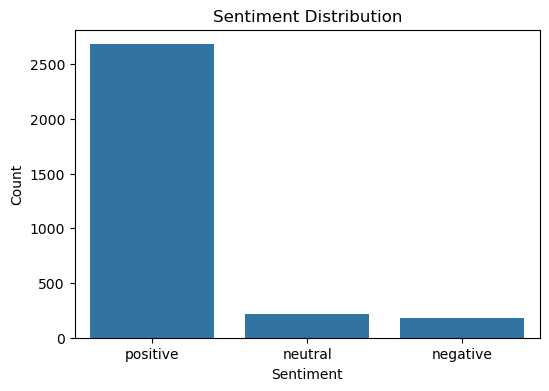

In [264]:
#Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")  # must exactly match
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

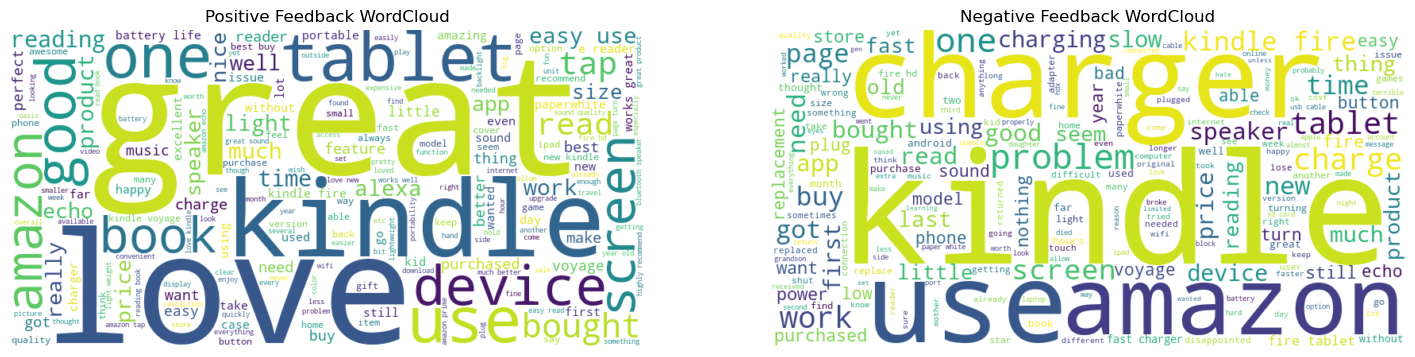

In [280]:
#Positive + Negative WorldCloud Side-by-Side
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

stop_words = set(stopwords.words("english"))

# ====== POSITIVE TEXT ======
positive_reviews = df[df['sentiment'] == "positive"]
pos_text = " ".join(positive_reviews['cleaned'])
pos_words = [w for w in pos_text.split() if w not in stop_words]
pos_text_filtered = " ".join(pos_words)

# WordCloud
wc_pos = WordCloud(width=800, height=400, background_color="white").generate(pos_text_filtered)

# ====== NEGATIVE TEXT ======
negative_reviews = df[df['sentiment'] == "negative"]
neg_text = " ".join(negative_reviews['cleaned'])
neg_words = [w for w in neg_text.split() if w not in stop_words]
neg_text_filtered = " ".join(neg_words)

# WordCloud
wc_neg = WordCloud(width=800, height=400, background_color="white").generate(neg_text_filtered)

# ====== PLOT SIDE-BY-SIDE ======
plt.figure(figsize=(18, 7))

# Positive WC
plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Feedback WordCloud")

# Negative WC
plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Feedback WordCloud")

plt.show()

In [284]:
#
# Count top 20 for each sentiment
pos_top = Counter(pos_words).most_common(20)
neg_top = Counter(neg_words).most_common(20)

# Convert to DataFrame
pos_df = pd.DataFrame(pos_top, columns=["positive_word", "positive_count"])
neg_df = pd.DataFrame(neg_top, columns=["negative_word", "negative_count"])

# Combine side-by-side
comparison_table = pd.concat([pos_df, neg_df], axis=1)

comparison_table

,positive_word,positive_count,negative_word,negative_count
0,great,926,kindle,79
1,kindle,912,fire,43
2,use,593,charger,41
3,love,577,amazon,35
4,easy,510,tablet,31
5,one,440,one,31
6,good,436,use,31
7,tablet,434,problem,21
8,amazon,428,fast,20
9,like,392,screen,20


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rssan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\rssan\AppData\Local\Temp\ipykernel_34760\3267862510.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='word', x='count', data=neg_df, palette="Reds_r")


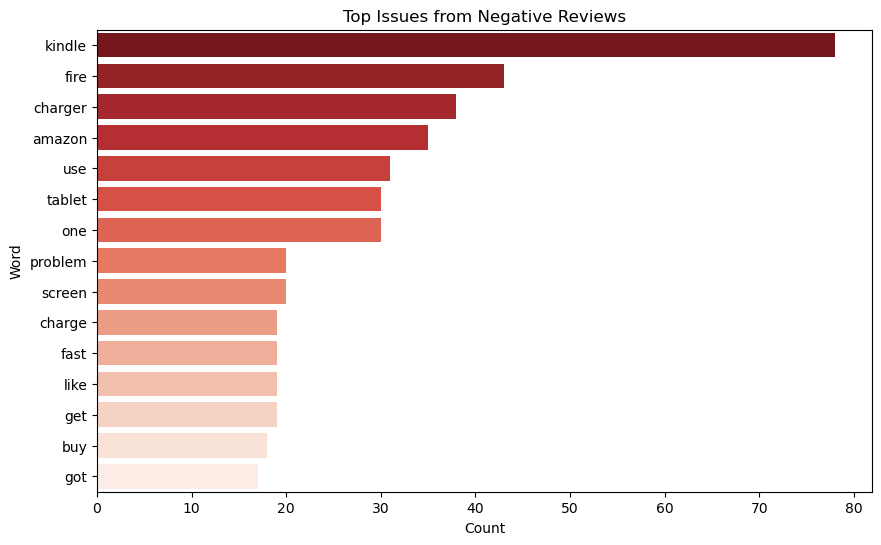

In [268]:
#Creat a barplot showing the most frequent words in negative reviews
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Download stopwords if not already
nltk.download('stopwords')

# Filter only negative reviews
negative_reviews = df[df['sentiment'] == "negative"]

# Tokenize & remove stopwords
stop_words = set(stopwords.words("english"))
all_negative_words = " ".join(negative_reviews['cleaned_feedback']).split()
filtered_words = [w for w in all_negative_words if w not in stop_words]

# Count top 15 words
word_freq = Counter(filtered_words).most_common(15)
neg_df = pd.DataFrame(word_freq, columns=['word','count'])

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(y='word', x='count', data=neg_df, palette="Reds_r")
plt.title("Top Issues from Negative Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()